In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.manifold import TSNE
import matplotlib.cm as cm # импортируем цветовые схемы, чтобы рисовать графики.
from sklearn.decomposition import PCA
import xgboost as xgb
from sklearn.model_selection import cross_val_score
import xgboost as xgb
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier

In [3]:
X_train = pd.read_csv('data_public/x_train.csv', header=None)
Y_train = pd.read_csv('data_public/y_train.csv', header=None)
Y_train.columns = ['target']

In [4]:
data = pd.concat([X_train, Y_train], axis=1)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,target
0,1,1,1,1,0,0,0,1,0,0,...,1,1,1,1,0,1,1,0,1,1
1,1,0,1,0,0,0,1,1,0,1,...,1,1,0,1,0,0,1,0,0,1
2,0,1,1,0,0,0,0,1,1,1,...,1,0,0,1,1,1,0,1,0,1
3,1,0,1,1,0,1,0,1,1,0,...,1,0,0,1,0,1,1,1,0,0
4,1,1,0,0,1,0,0,1,0,1,...,1,0,1,1,1,1,0,1,1,2


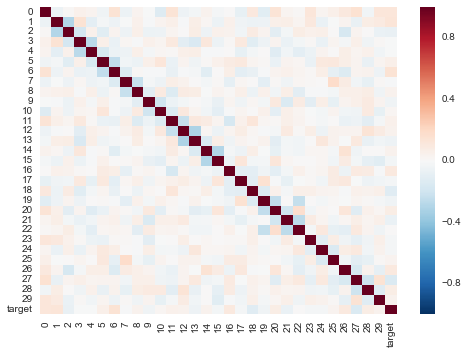

In [5]:
sns.heatmap(data.corr())

In [6]:
clf = xgb.XGBClassifier(n_estimators=1000)
scores = cross_val_score(clf, X_train, Y_train.target.ravel(), cv=5, scoring='accuracy')
print("Score: {} (+/- {})".format(scores.mean(), scores.std() * 2))

Score: 0.4393466223698782 (+/- 0.12948292246716975)


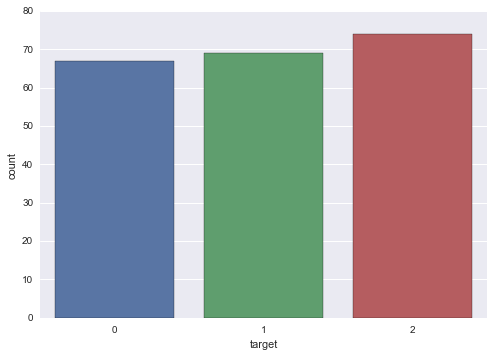

In [6]:
sns.countplot(data=Y_train, x='target')

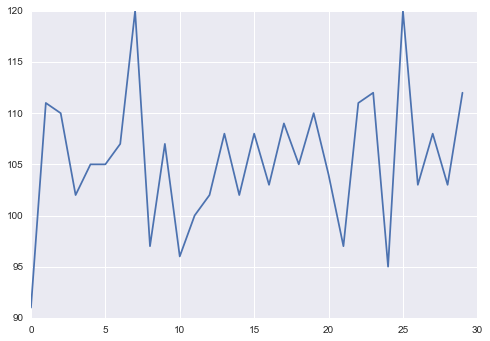

In [7]:
plt.plot(X_train.sum().ravel())

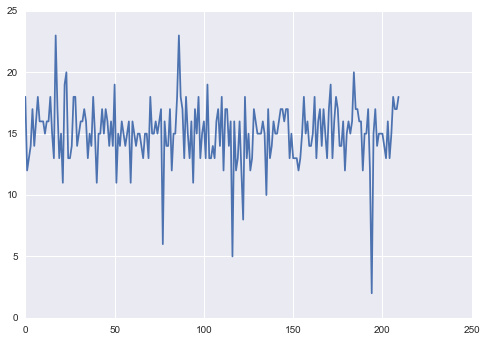

In [8]:
plt.plot(X_train.T.sum().ravel())

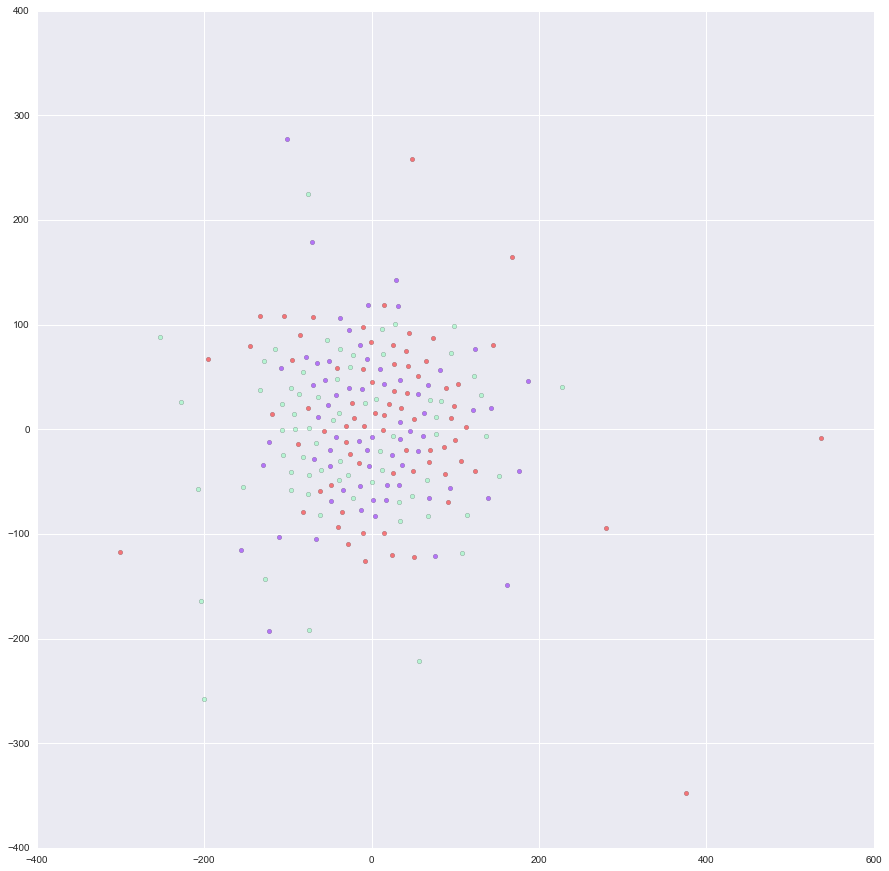

In [16]:
tsne = TSNE(n_components=2, random_state=42, init='pca')
tsne_representation = tsne.fit_transform(X_train)
plt.subplots(figsize=(15,15))
colors = cm.rainbow(np.linspace(0, 1, len(set(Y_train.target))))
for y_, c in zip(set(Y_train.target), colors):
    plt.scatter(tsne_representation[Y_train.target.values==y_, 0], 
                tsne_representation[Y_train.target.values==y_, 1], c=c, alpha=0.5, label=str(y_))

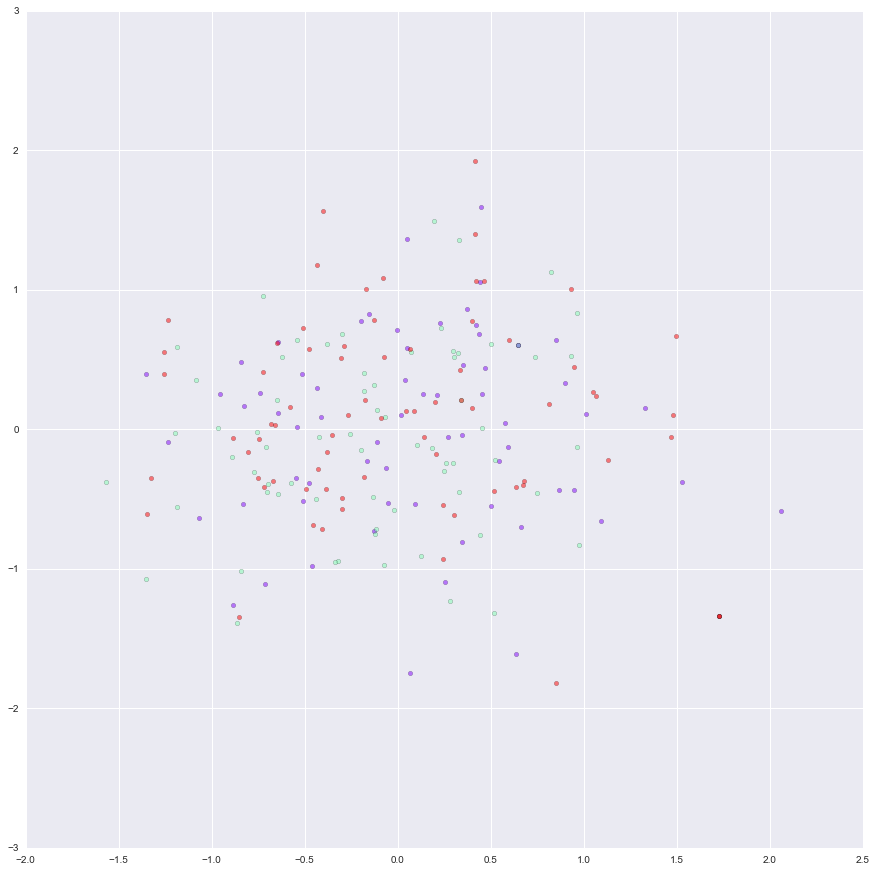

In [17]:
pca_representation = PCA(n_components=2).fit_transform(X_train)
plt.subplots(figsize=(15,15))
colors = cm.rainbow(np.linspace(0, 1, len(set(Y_train.target))))
for y_, c in zip(set(Y_train.target), colors):
    plt.scatter(pca_representation[Y_train.target.values==y_, 0], 
                pca_representation[Y_train.target.values==y_, 1], c=c, alpha=0.5, label=str(y_))

In [13]:
d = pd.DataFrame(index=X_train.index)
d['target'] = Y_train
d['kurtosis'] = X_train.apply(lambda row: stats.kurtosis(row), axis=1)
d['entropy'] = X_train.apply(lambda row: stats.entropy(row), axis=1)
d['std'] = X_train.apply(lambda row: np.std(row)**2, axis=1)
d['normal_stat'] = X_train.apply(lambda row: stats.normaltest(row)[0], axis=1)
d['mean'] = X_train.apply(lambda row: np.mean(row), axis=1)
d.head()

,target,kurtosis,entropy,std,normal_stat,mean
0,1,-1.833333,2.890372,0.240000,71.292477,0.600000
1,1,-1.833333,2.484907,0.240000,71.292477,0.400000
2,1,-1.927602,2.564949,0.245556,132.604517,0.433333
3,0,-1.982143,2.639057,0.248889,222.464936,0.466667
4,2,-1.927602,2.833213,0.245556,132.604517,0.566667


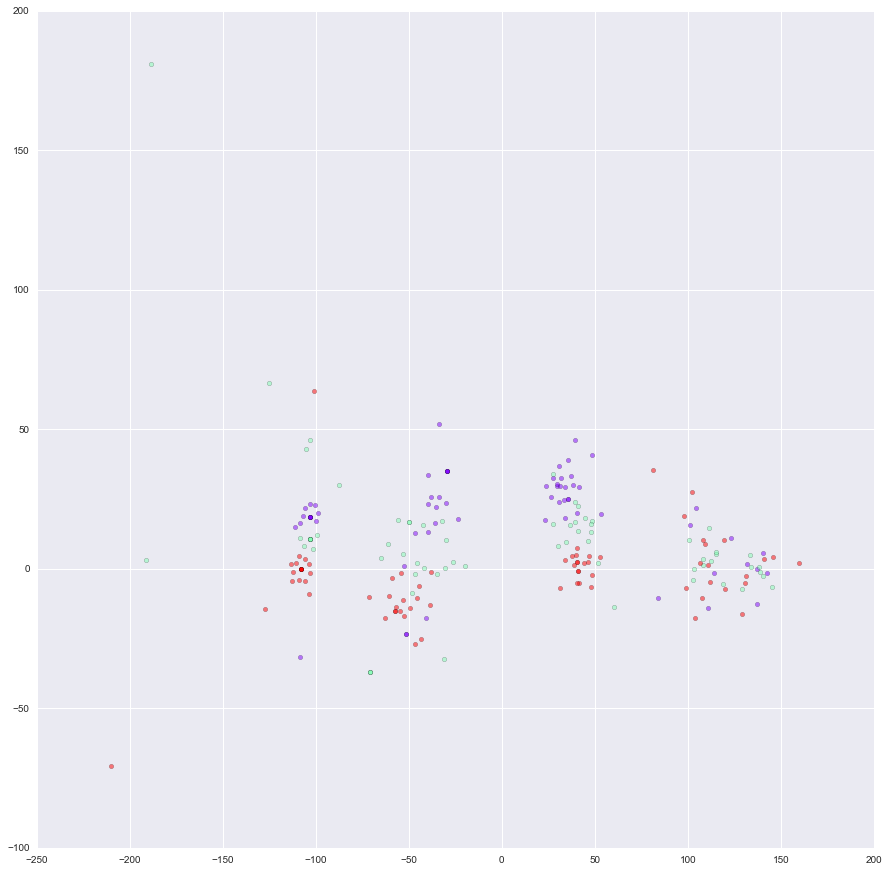

In [34]:
tsne = TSNE(n_components=2, random_state=42, init='pca')
d_low = tsne.fit_transform(d)
plt.subplots(figsize=(15,15))
colors = cm.rainbow(np.linspace(0, 1, len(set(Y_train.target))))
for y_, c in zip(set(Y_train.target), colors):
    plt.scatter(d_low[Y_train.target.values==y_, 0], 
                d_low[Y_train.target.values==y_, 1], c=c, alpha=0.5, label=str(y_))

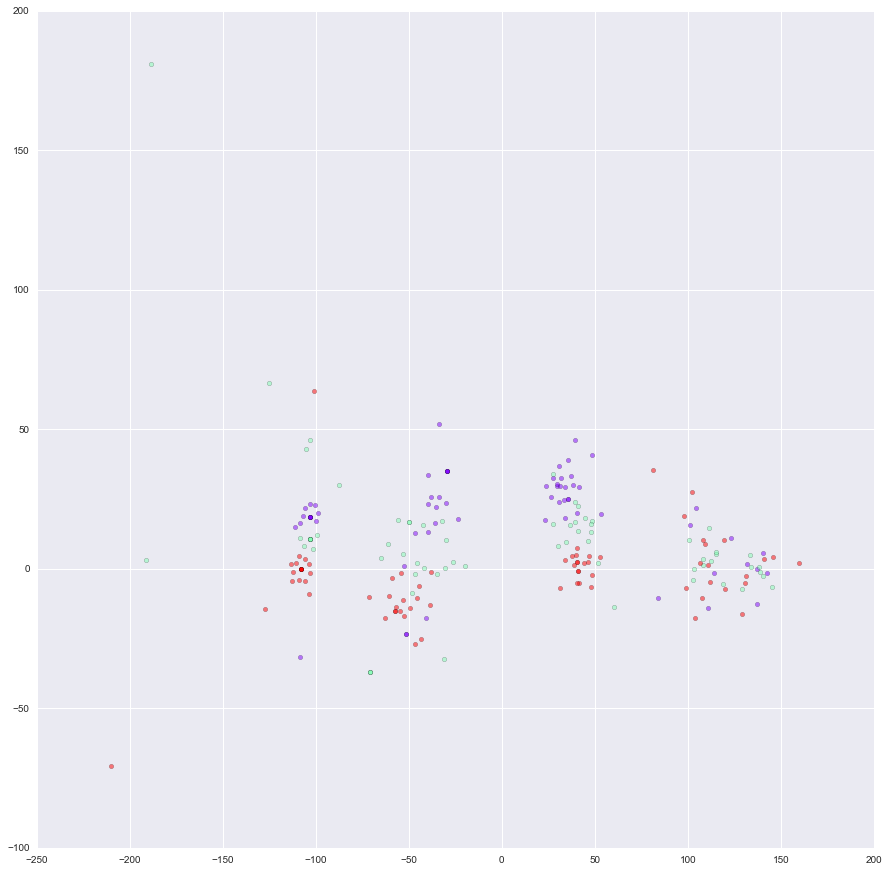

In [39]:
scaler = StandardScaler()
tsne = TSNE(n_components=2, random_state=42, init='pca')
d_low_scaled = tsne.fit_transform(scaler.fit_transform(d))
plt.subplots(figsize=(15,15))
colors = cm.rainbow(np.linspace(0, 1, len(set(Y_train.target))))
for y_, c in zip(set(Y_train.target), colors):
    plt.scatter(d_low[Y_train.target.values==y_, 0], 
                d_low[Y_train.target.values==y_, 1], c=c, alpha=0.5, label=str(y_))

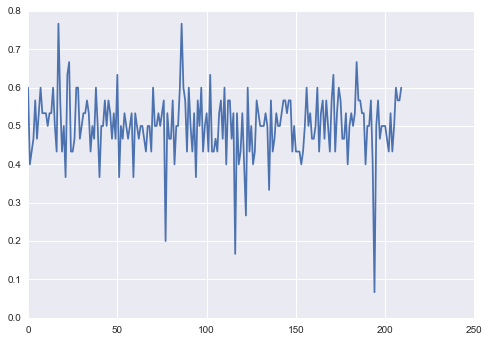

In [23]:
plt.plot(d['mean'])

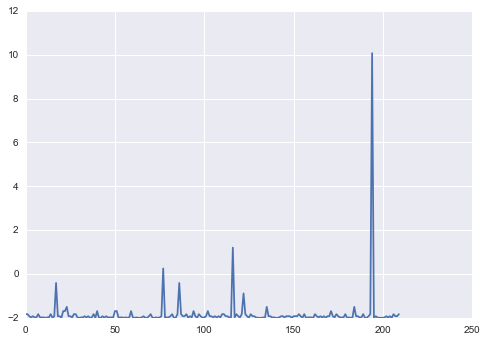

In [22]:
plt.plot(d['kurtosis'])

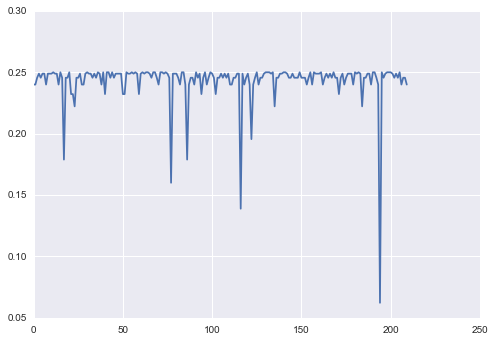

In [24]:
plt.plot(d['std'])

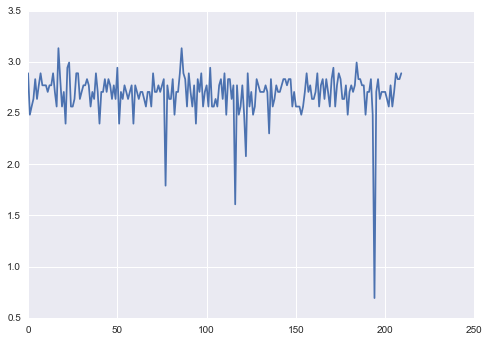

In [25]:
plt.plot(d['entropy'])

In [26]:
clf = xgb.XGBClassifier(n_estimators=100)
y = d.target.ravel()
x = d.drop(['target'], axis=1)
scores = cross_val_score(clf, x,y , cv=StratifiedKFold(5, random_state=42), scoring='accuracy')
print("Score: {} (+/- {})".format(scores.mean(), scores.std() ** 2))

Score: 0.35143964562569213 (+/- 0.00429010472045317)


In [35]:
def knn(X, y):
    clf = KNeighborsClassifier()
    params = {
        'n_neighbors': [5, 8, 9, 10, 11, 12, 13, 14,15,16,17,18,19,20], 
        'metric': ['hamming', 'jaccard', 'minkowski'],
        'weights': ['uniform', 'distance']}
    grid_search = GridSearchCV(clf, param_grid=params, cv=StratifiedKFold(5, random_state=42), scoring='accuracy')
    grid_search.fit(X, y)
    print('Best score: {}'.format(grid_search.best_score_))
    print('Best parameters: {}'.format(grid_search.best_params_))
    return grid_search

x = d.drop(['target'], axis=1)
clf = knn(pd.concat([x, X_train], axis=1), y)
clf = knn(d_low, y)
clf = knn(x, y)

Best score: 0.44761904761904764
Best parameters: {'metric': 'jaccard', 'n_neighbors': 16, 'weights': 'uniform'}
Best score: 0.7142857142857143
Best parameters: {'metric': 'minkowski', 'n_neighbors': 5, 'weights': 'distance'}
Best score: 0.3761904761904762
Best parameters: {'metric': 'minkowski', 'n_neighbors': 12, 'weights': 'uniform'}


In [40]:
clf = knn(d_low_scaled, y)

Best score: 0.7857142857142857
Best parameters: {'metric': 'minkowski', 'n_neighbors': 8, 'weights': 'distance'}


In [ ]:
plt.scatter(y=d['kurtosis'], x=d['target'])

In [ ]:
plt.scatter(y=d['entropy'], x=d['target'])

In [ ]:
plt.scatter(y=d['mean'], x=d['target'])